---
#### Basic LightGBM modeling 
---

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel", 
              rc={"font.size": 9, "axes.titlesize": 9, "axes.labelsize": 9,
              "xtick.labelsize": 9, "ytick.labelsize": 9})  

import warnings
warnings.filterwarnings(action='ignore')  ## 경고문구 생략 
import koreanize_matplotlib               ## 한글사용 

#data loading
data_path = 'kaggle/input/competitive-data-science-predict-future-sales/'
submission = pd.read_csv(data_path + 'sample_submission.csv')

X_train = pd.read_csv('temp_data/X_train.csv') 
X_valid = pd.read_csv('temp_data/X_valid.csv') 
X_test = pd.read_csv('temp_data/X_test.csv') 
y_train = pd.read_csv('temp_data/y_train.csv') 
y_valid = pd.read_csv('temp_data/y_valid.csv') 

In [31]:
print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape) 

(10675678, 4) (238172, 4) (214200, 4) (10675678, 1) (238172, 1)


In [32]:
import lightgbm as lgb 

## Light GBM parameters setting 
params = {'metric' : 'rmse', 
          'num_leaves' : 255, 
          'learning_rate' : 0.01, 
          'force_col_wise' : True, 
          'random_state' : 10,
          'verbose': -1     # verbose -1/0/1 ~ 로그출력 x / 에러만 출력 / 모든로그 출력
           }

## categorical features setting 
cat_features = ['상점ID', '상품분류ID']

## Light GBM train/valid dataset 
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

## model training 
lgb_model = lgb.train(params=params,
                      train_set=dtrain,
                      num_boost_round=500,
                      valid_sets=(dtrain, dvalid),
                      categorical_feature=cat_features)                      

In [33]:
## 훈련결과 확인 
from sklearn.metrics import mean_squared_error

# 훈련 데이터와 검증 데이터에 대한 예측 수행
train_pred = lgb_model.predict(X_train)
valid_pred = lgb_model.predict(X_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))

# 최종 훈련 및 검증 RMSE 출력
print(f"Final training RMSE: {train_rmse}")
print(f"Final validation RMSE: {valid_rmse}")

Final training RMSE: 1.0479198713313367
Final validation RMSE: 1.007217092789256


In [35]:
## 제출파일 생성 (0~20 사이의 값이어야 함) 
print(submission.head())

preds = lgb_model.predict(X_test).clip(0,20)
submission['item_cnt_month'] = preds  
submission.to_csv('submission.csv', index=False)

   ID  item_cnt_month
0   0             0.5
1   1             0.5
2   2             0.5
3   3             0.5
4   4             0.5


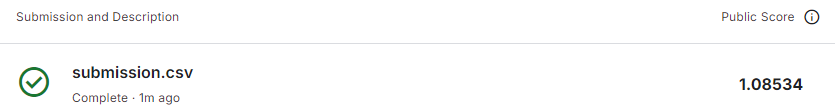

In [36]:
from IPython.display import Image
Image('images/score_2_09.PNG')